# MULTI LAYER PROCESSING

In [1]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
#Model Parameters
input_size=2 #number of features
layers=[4,3]
output_size=2

In [3]:
def softmax(a):
    e=np.exp(a) #vector
    ans=e/np.sum(e,axis=1,keepdims=True)  #keepdims allows it to be linear array
    return ans

In [4]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model={}
        #For first layer
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        #For second layer
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        #For final layer
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model  
        self.activation_output_=None
        
    #Forward Propogation
    def forward(self,x):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,W1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,W3)+b3
        y_=softmax(z3)
        
        self.activation_outputs=(a1,a2,y_)
        return y_
    
    #Backward Propogation
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        m=x.shape[0]
        
        a1,a2,y_=self.activation_outputs
        
        #we will start by computing error in the final step
        delta3=y_-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)/float(m)
        
        delta2=(1-np.square(a2))*np.dot(delta3,W3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)/float(m)
        
        delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
        dw1=np.dot(X.T,delta1)
        db1=np.sum(delta1,axis=0)/float(m)
        
        
        #Update the model parameters using Gradient Descent
        self.model['W1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['W2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['W3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_=self.activation_outputs
        
        print("W1",W1.shape)
        print('A1',a1.shape)
        
        print("W2",W2.shape)
        print('A2',a2.shape)
        
        print("W3",W3.shape)
        print('A3',y_.shape)
        

In [5]:
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l

In [6]:
def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

TRAINING THE MODEL

In [7]:
model=NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [8]:
X,Y=make_circles(n_samples=500,shuffle=True,noise=0.05,random_state=1,factor=0.8)

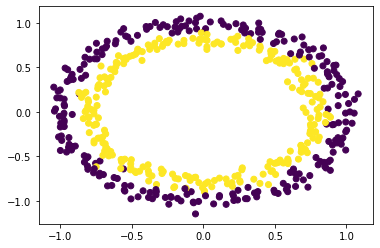

In [9]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [10]:
model.forward(X)
#model.backward(X,Y_OHT)
model.summary()

W1 (2, 10)
A1 (500, 10)
W2 (10, 5)
A2 (500, 5)
W3 (5, 2)
A3 (500, 2)


In [11]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    classes=2
    Y_OHT=one_hot(Y,classes)
    
    for i in range(epochs):
        Y_=model.forward(X)
        l=loss(Y_OHT,Y_)
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)

    return training_loss

In [12]:
training_loss=train(X,Y,model,500,0.00001)

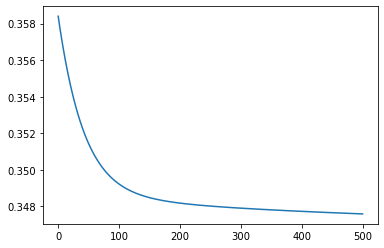

In [13]:
plt.plot(training_loss)
plt.show()

In [14]:
#Finding ACCURACY

In [15]:
outputs=model.predict(X)

In [16]:
accuracy=np.sum(outputs==Y)/Y.shape[0]

In [17]:
accuracy

0.516

TESING ON OTHER DATASETS

In [18]:
#Xor dataset
model=NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [19]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])

In [20]:
Y=np.array([0,1,1,0])

In [21]:
#lossf=train(X,Y,model,50,0.0001)

OTHER DATASETS

In [22]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [23]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y=make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='circles':
        X,Y=make_circles(n_samples=500,shuffle=True,noise=0.05,random_state=1,factor=0.8)
    elif dataset=='classification':
        X,Y=make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=2,random_state=1)
    elif dataset=='xor':
        X=np.array([[0,0],[0,1],[1,0],[1,1]])
        Y=np.array([0,1,1,0])
    return X,Y

1.0


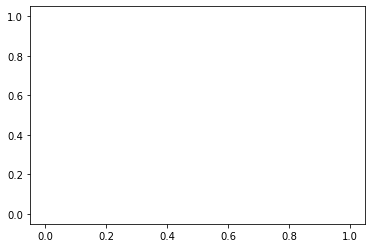

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

In [24]:
datasets=["xor",'classification',"moons","circles"]

for d in datasets:
    model=NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y=load_dataset(d)
    train(X,Y,model,1000,0.001)
    outputs=model.predict(X)
    
    accuracy=np.sum(outputs==Y)/Y.shape[0]
    print (accuracy)
    plt.plot(X[:,0],X[:,1],c=Y)
    plt.show()